8.0


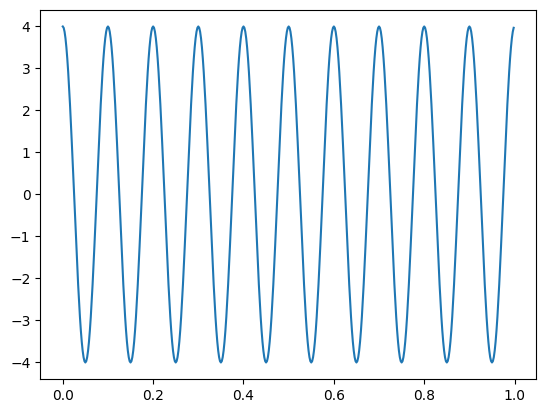

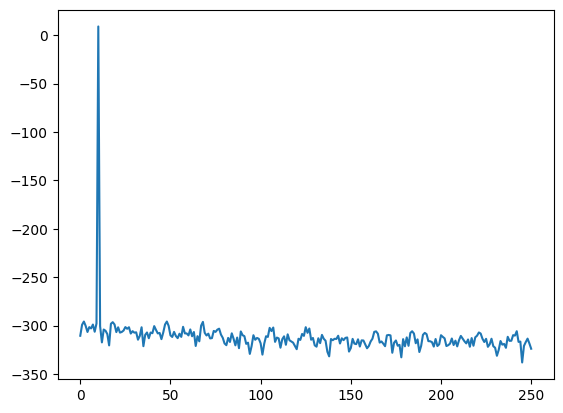

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
from scipy import signal

fs  = 500
N   = fs
Ts  = 1/fs
T_simulacion    = N*Ts

ff  = 10
AA  = 4 #np.sqrt(2)
ph  = np.pi/2.0
dc  = 0
plt.figure(0)
tt = np.arange(start=0, stop=T_simulacion, step=Ts)
xx = AA*np.sin(2*np.pi*ff*tt + ph) + dc
plt.plot(tt, xx)
print(np.var(xx))
df  = fs/N
ff = np.arange(start=0, stop=(N)*df, step=df)
#ff = np.linspace(0, (N-1)*df, N)
plt.figure(1)
ft_XX = (1/N)*np.fft.fft( xx, axis = 0 )
bfrec = ff <= fs/2
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2))

0.35525048559945666


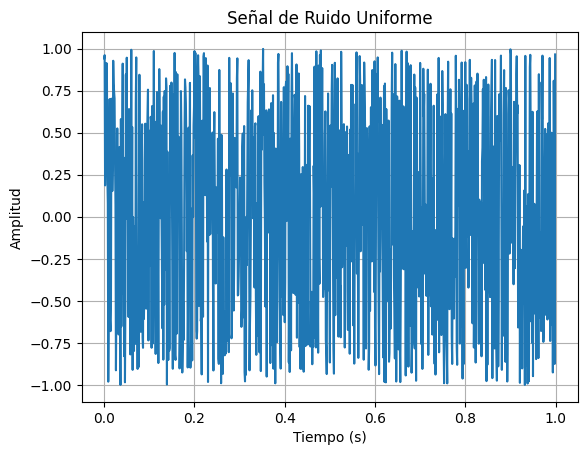

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal de ruido
amplitud = 1.0     # Amplitud máxima del ruido
offset = 0.0       # Desplazamiento (opcional)

# Configuración de la señal
fs = 1000          # Frecuencia de muestreo
dur = 1            # Duración en segundos
num_samples = fs * dur  # Número total de muestras

# Generación de la señal de ruido uniforme
ruido_uniforme = np.random.uniform(-amplitud, amplitud, num_samples) + offset
print(np.var(ruido_uniforme))
# Visualización de la señal de ruido
plt.plot(np.arange(num_samples) / fs, ruido_uniforme)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de Ruido Uniforme')
plt.grid()
plt.show()


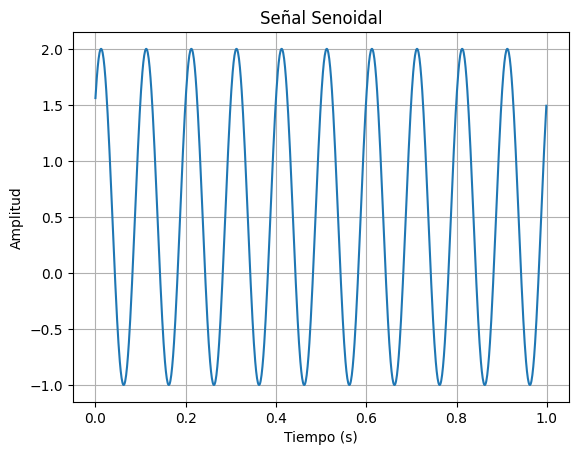

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal senoidal
ff = 10      # Frecuencia en Hz
AA = 1.5     # Amplitud
ph = np.pi/4 # Fase en radianes
dc = 0.5     # Componente de continua

# Parámetros de la simulación
fs = 1000.0  # Frecuencia de muestreo en Hz
N = 1000     # Número de muestras
T_simulation = N / fs  # Tiempo total de simulación en segundos

# Tiempo de muestreo y vector de tiempo
Ts = 1 / fs
tt = np.arange(0, T_simulation, Ts)

# Generación de la señal senoidal
señal = AA * np.sin(2 * np.pi * ff * tt + ph) + dc

# Visualización de la señal
plt.plot(tt, señal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Senoidal')
plt.grid()
plt.show()


0.10000000000000002


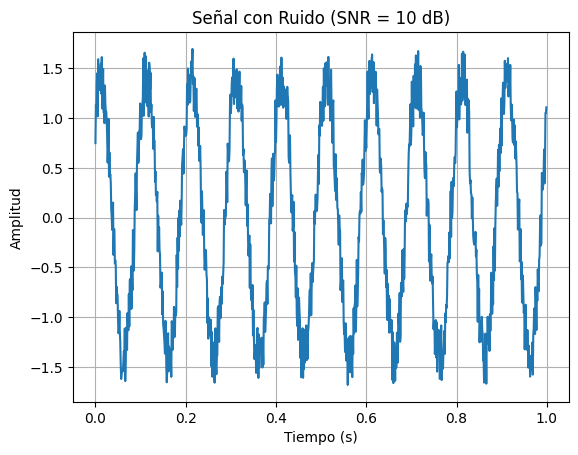

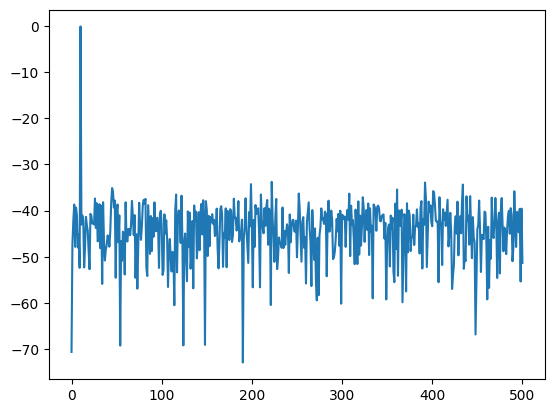

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def generar_senoidal(ff, AA, ph, dc, fs, N):
    Ts = 1 / fs
    tt = np.arange(start=0, stop=N*Ts, step=Ts)
    señal = AA * np.sin(2 * np.pi * ff * tt + ph) + dc
    return tt, señal

def generar_ruido_uniforme(snr, señal):
    pot_señal = np.var(señal)
    pot_ruido = pot_señal / (10**(snr / 10))  # Convertir SNR a escala lineal
    print(pot_ruido)
    ruido = np.random.uniform(-np.sqrt(pot_ruido) , np.sqrt(pot_ruido) , len(señal))
    return ruido

# Parámetros de la señal senoidal
ff = 10      # Frecuencia en Hz
AA = np.sqrt(2)     # Amplitud
ph = np.pi/4 # Fase en radianes
dc = 0.0     # Componente de continua

# Parámetros de la simulación
fs = 1000.0  # Frecuencia de muestreo en Hz
N = 1000     # Número de muestras

# Parámetros de la SNR
snr = 10     # Relación señal-ruido en dB

# Generar la señal senoidal usando la función
tt, señal = generar_senoidal(ff, AA, ph, dc, fs, N)

# Generar el ruido con la función y agregarlo a la señal
ruido = generar_ruido_uniforme(snr, señal)
señal_con_ruido = señal + ruido

# Visualización de la señal con ruido
plt.plot(tt, señal_con_ruido)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title(f'Señal con Ruido (SNR = {snr} dB)')
plt.grid()
plt.show()

df  = fs/N
ff = np.arange(start=0, stop=(N)*df, step=df)
#ff = np.linspace(0, (N-1)*df, N)
plt.figure(1)
ft_XX = (1/N)*np.fft.fft( señal_con_ruido, axis = 0 )
bfrec = ff <= fs/2
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2))


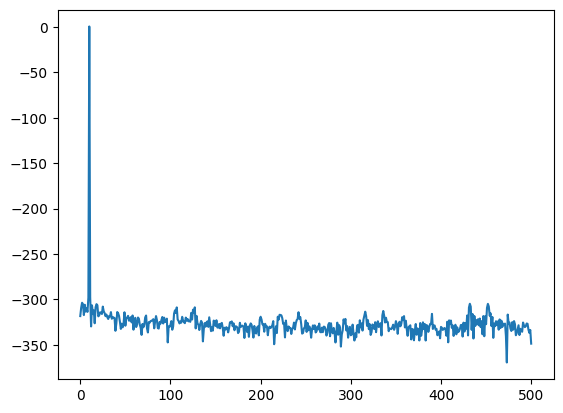

In [23]:
df  = fs/N
ff = np.arange(start=0, stop=(N)*df, step=df)
#ff = np.linspace(0, (N-1)*df, N)
plt.figure(1)
ft_XX = (1/N)*np.fft.fft( señal, axis = 0 )
bfrec = ff <= fs/2
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2))

1.0000000000000002
1.0000000000000002


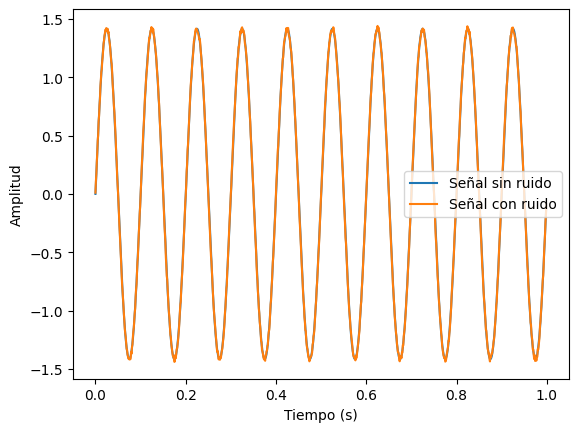

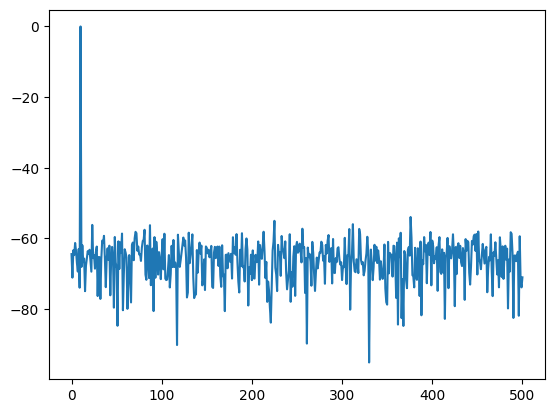

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una señal senoidal
f = 10 # Frecuencia en Hz
T = 1 # Duración en segundos
fs = 1000 # Frecuencia de muestreo en Hz
t = np.arange(0, T, 1/fs) # Vector de tiempo
A = np.sqrt(2)
x = A*np.sin(2*np.pi*f*t) # Vector de señal

# Calcular la potencia de la señal
Px = np.mean(x**2)
print(np.var(x))
print(Px)
# Definir la SNR deseada en dB
SNR = 40

# Calcular la varianza del ruido
sigma2 = Px / (10**(SNR/10))

# Generar el ruido uniforme
a = -np.sqrt(6*sigma2) # Límite inferior
b = np.sqrt(6*sigma2) # Límite superior
n = np.random.uniform(a, b, len(x)) # Vector de ruido

# Agregar el ruido a la señal
y = x + n

# Graficar la señal con y sin ruido
plt.figure()
plt.plot(t, x, label='Señal sin ruido')
plt.plot(t, y, label='Señal con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

df  = fs/N
ff = np.arange(start=0, stop=(N)*df, step=df)
#ff = np.linspace(0, (N-1)*df, N)
plt.figure(1)
ft_XX = (1/N)*np.fft.fft( y, axis = 0 )
bfrec = ff <= fs/2
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2))
